In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

3- Convolutional Networks. Study the performance properties of the convolutional network provided in the Tensorflow tutorial. How is 
the learning affected if instead of ReLU units, tanh() activations are used? What is the reason for this? Compare also
at least two different optimizer algorithms.

YOUR ANWSER HERE:



In [8]:
# Building the model
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [9]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.7499 - accuracy: 0.3526 - val_loss: 1.2083 - val_accuracy: 0.5648
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2023 - accuracy: 0.5749 - val_loss: 1.0638 - val_accuracy: 0.6205
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0289 - accuracy: 0.6408 - val_loss: 0.9845 - val_accuracy: 0.6519
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9167 - accuracy: 0.6790 - val_loss: 0.9366 - val_accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8384 - accuracy: 0.7030 - val_loss: 0.9013 - val_accuracy: 0.6901
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7815 - accuracy: 0.7260 - val_loss: 0.8810 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7320 - accuracy: 0.7418 - val_loss: 0.9004 -

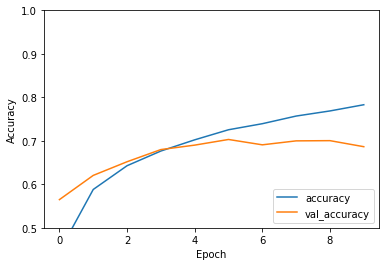

In [10]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

4- Try to outperform the convolutional network of part 3 with a MLP that uses approximately the same number of parameters.
Report your results and explain them.

YOUR ANWSER HERE:
